# Assignment 2 - CSCI 450 | Malek Elaghel

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, filters, transform, io
import os
import numpy as np
from scipy.ndimage import median_filter

## Question 1.

### a. Apply two Gaussian filters with sigmas 2 and 4 respectively on a grayscale version of the “astronaut” image from the skimage data module. Now subtract the latter output (sigma=4) from the former one (sigma=2). Display the two outputs and this difference image side by side.

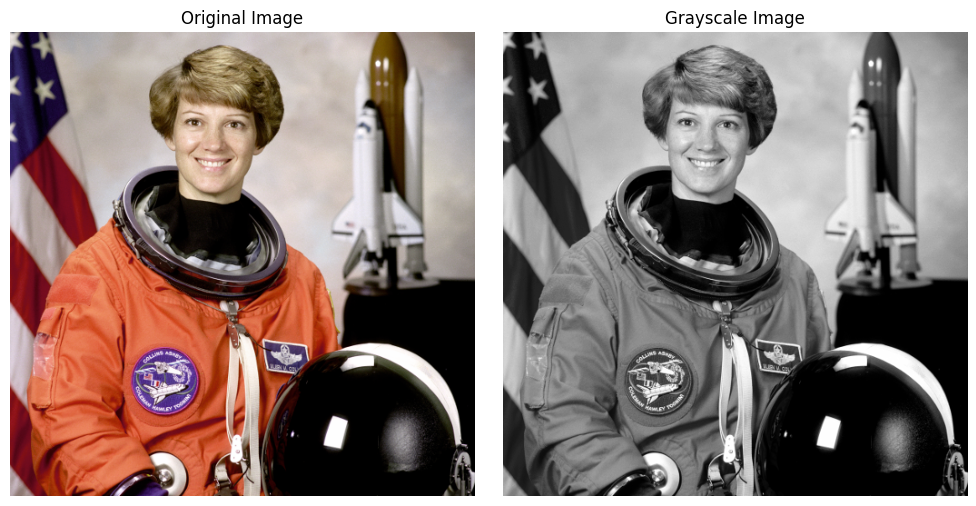

In [4]:
# Load the astronaut image
image = data.astronaut()

# Convert the image to grayscale
grayscale_image = color.rgb2gray(image)


# Display the original and grayscale image
images = [image, grayscale_image]
titles = ["Original Image", "Grayscale Image"]

# Create a single row of subplots
fig, axes = plt.subplots(1, len(images), figsize=(10, 5))

# Iterate through images and titles, displaying them in subplots:
for ax, img, title in zip(axes, images, titles):
    ax.imshow(img, 'gray')
    ax.set_title(title)
    ax.axis('off')
plt.tight_layout()
plt.show()



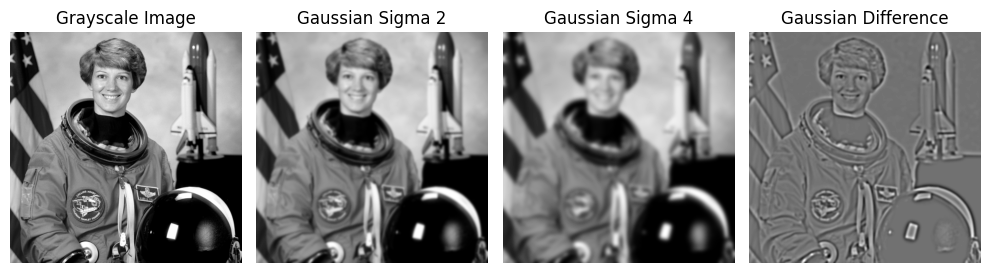

In [5]:
# Now apply the Gaussian filter with sigma = 2 and sigma = 4 on the grayscale image
gaussian_sigma2 = filters.gaussian(grayscale_image, sigma=2)
gaussian_sigma4 = filters.gaussian(grayscale_image, sigma=4)
gaussian_difference = gaussian_sigma2 - gaussian_sigma4

# Display the original grayscale image with different sigma values of Gaussian filter
# and the difference between them meaning the edges.
images = [grayscale_image, gaussian_sigma2, gaussian_sigma4, gaussian_difference]
titles = ["Grayscale Image", "Gaussian Sigma 2", "Gaussian Sigma 4", "Gaussian Difference"]

# Create a single row of subplots
fig, axes = plt.subplots(1, len(images), figsize=(10, 5))

# Iterate through images and titles, displaying them in subplots:
for ax, img, title in zip(axes, images, titles):
    ax.imshow(img, 'gray')
    ax.set_title(title)
    ax.axis('off')
plt.tight_layout()
plt.show()


### b. Use SP.jpg (attached) for this question. This image has salt and pepper noise. Use a median filter to remove this noise. Display the original and new images side by side.

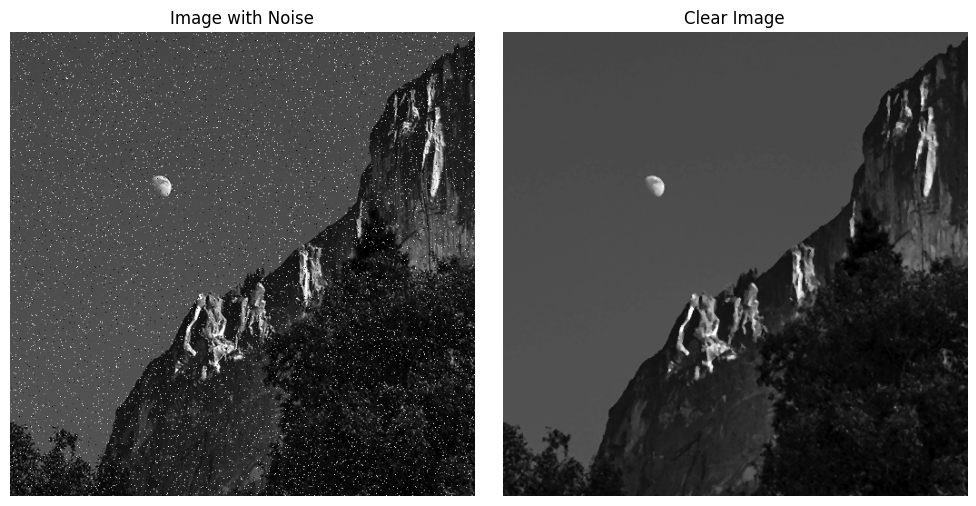

In [7]:

# Load the image with salt and pepper noise
image_SP = io.imread('SP.jpg', as_gray=True)
# Souce for as_gray: https://scikit-image.org/docs/stable/api/skimage.io.html#skimage.io.imread

# Apply a median filter to remove the noise.
# Googled how to apply median filter and SciPy came up first.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.median_filter.html#scipy.ndimage.median_filter

# Adjust the filter size as needed (guessing 3x3 is a good start)
image_clear = median_filter(image_SP, size=3)

# Display the original and denoised images side by side
images = [image_SP, image_clear]
titles = ["Image with Noise", "Clear Image"]

# Create a single row of subplots
fig, axes = plt.subplots(1, len(images), figsize=(10, 5))

# Iterate through images and titles, displaying them in subplots:
for ax, img, title in zip(axes, images, titles):
    ax.imshow(img, 'gray')
    ax.set_title(title)
    ax.axis('off')
plt.tight_layout()
plt.show()


In [29]:
#image_SP.shape, image_clear.shapes

((512, 512), (512, 512))

## Question 2.

### Write a function called tinyImage that creates a feature vector out of a color image as follows: the image is first resized to 16x16 pixels (skimage.transform.resize), then all pixels (16x16x3=768) are stretched out in the form of one vector. Repeat last week’s retrieval experiment on Oxford Flowers with this feature vector instead of color histogram. You may use any distance measure.
(I called mine tiny_image as it is conventional in Python to use snake_case)

In [5]:
path = 'jpg'
imagelist = os.listdir(path)
len(imagelist)

8189

In [6]:
# This is to eliminate the 'Thumbs.db' filename from the list
if imagelist[-1]=='Thumbs.db':
    imagelist = imagelist[:-1]
len(imagelist)

8189

In [7]:
# Creating the function tiny_image to resize the images to 16x16 pixels.
def tiny_image(image):

    # Resize the image to 16x16 pixels
    resized_image = transform.resize(image, (16, 16), anti_aliasing=True)

    # Flatten the resized image into one vector
    feature_vector = resized_image.ravel()

    return feature_vector


In [18]:
featuresize = 768 # 3 channels * 16*16 image sizw

features = np.empty((len(imagelist),featuresize))

# Process each image
for i, imagename in enumerate(imagelist):
    image = io.imread(os.path.join(path, imagename))
    features[i, :] = tiny_image(image)
    line = f'\rProcessing images: {i + 1} of {len(imagelist)}'
    print(line, end='')


Processing images: 8189 of 8189

Random Picture

(-0.5, 499.5, 755.5, -0.5)

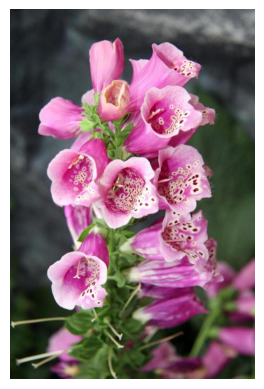

In [8]:
# Choose a random image to use as the query
querynum = np.random.randint(len(imagelist))

# Retrieve the query image
queryimage = io.imread(os.path.join(path, imagelist[querynum]))
plt.imshow(queryimage)
plt.axis('off')

Defining Distances:

In [25]:
# Euclidean Distance
def euclidean_distance(a, b):
    a = np.array(a)
    b = np.array(b)
    return np.sqrt(np.sum((a - b) ** 2))


In [26]:
# EUCLIDEAN DISTANCE
distances_euclidean = np.empty(len(imagelist))

# Comparing the distance of the query image and every image in the dataset
for i in range(len(imagelist)):
    distances_euclidean[i] = euclidean_distance(
        features[querynum, :], features[i, :])
    line = '\rProcessing ' + str(i+1) + ' of ' + str(len(imagelist))
    print(line, end='')
# This sorts the distances from smallest to largest
order_euclidean = np.argsort(distances_euclidean)
order_euclidean


Processing 8189 of 8189

array([2409, 4860, 4868, ..., 6793, 6649, 6650], dtype=int64)

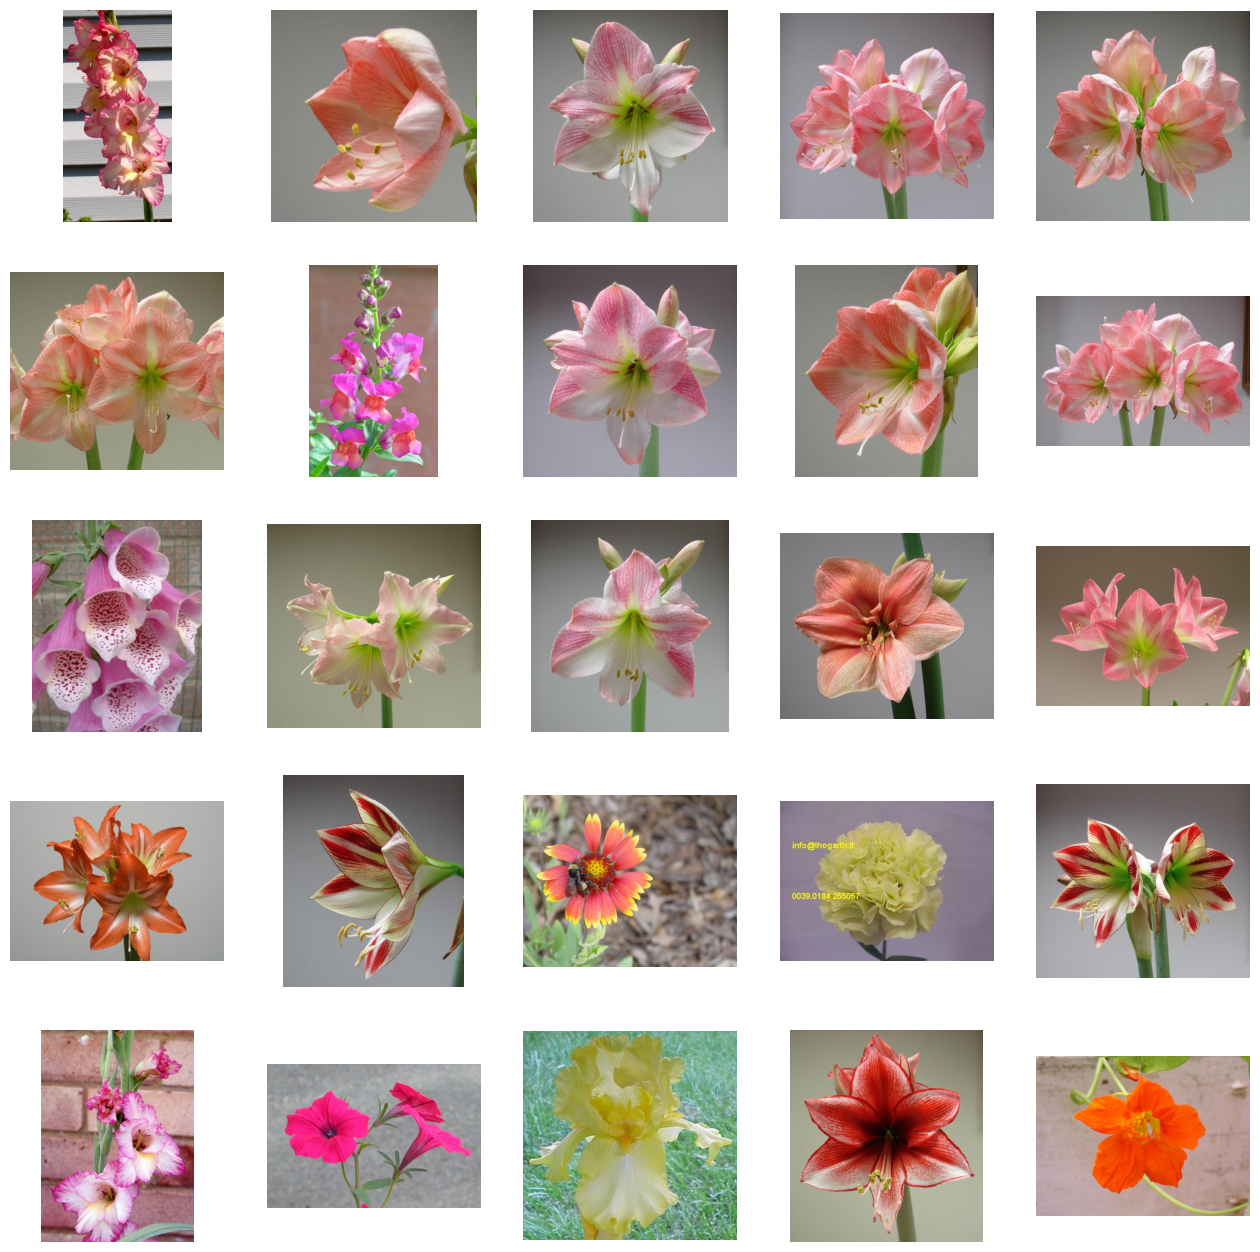

In [27]:
fig = plt.figure(figsize=[16,16])
rows = 5
cols = 5
for i in range(rows*cols):
    image = io.imread(os.path.join(path, imagelist[order_euclidean[i]]))
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(image)
    plt.axis('off')

plt.show()

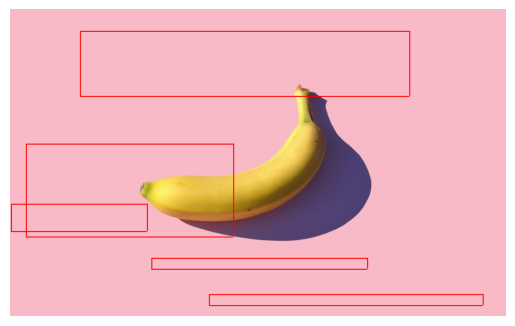

[[271  32 458 450]
 [392   2 447 276]
 [574 401 596 953]
 [501 285 523 720]
 [ 44 141 175 805]]


In [156]:
import numpy as np
from skimage import data, io
import matplotlib.pyplot as plt
  

def generate_random_boxes(image_or_path, n):
    if isinstance(image_or_path, str):
        # Load the image from a file path using skimage
        # RBG image (height, width, channels), unlike CV2 which is BGR.
        image = io.imread(image_or_path)
    elif isinstance(image_or_path, np.ndarray):
        # Use the provided image directly
        image = image_or_path
    else:
        raise ValueError(
            "Invalid input. The first parameter should be a file path (string) or an image (NumPy array).")

    # Get the height and width of the image
    height, width = image.shape[:2]

    # Initialize an empty array to store box coordinates
    boxes = np.zeros((n, 4), dtype=int)

    color = (255, 0, 0)  # Red color
    thickness = 2

    # Generate all random coordinates at once
    # np.random.randint is inclusive of low and exclusive of high.
    r1_values = np.random.randint(1, height, n) # Subtracting thickness may cause the box to be out of bounds: low >= high.
    c1_values = np.random.randint(1, width, n)
    r2_values = np.random.randint(r1_values + 1, height - 1, n)
    c2_values = np.random.randint(c1_values + 1, width - 1, n)

    for i in range(n):
        # Get the coordinates for the i-th box
        r1, c1, r2, c2 = r1_values[i], c1_values[i], r2_values[i], c2_values[i]
        boxes[i] = [r1, c1, r2, c2]
        # Draw the box on the image for visualization
        image = draw_box(image, r1, c1, r2, c2, color, thickness)

    # Convert the BGR image to RGB for matplotlib
    # image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image with boxes using matplotlib
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    return boxes


def draw_box(image, r1, c1, r2, c2, color, thickness):
    # Manually draw a box on the image
    image[r1:r1+thickness, c1:c2,...] = color  # Top edge
    image[r2:r2+thickness, c1:c2, ...] = color  # Bottom edge
    image[r1:r2, c1:c1+thickness,...] = color  # Left edge
    image[r1:r2, c2:c2+thickness,...] = color  # Right edge
    return image

# Example usage:
image = 'testpic.jpeg'
n = 5  # Number of random boxes to generate
box_coordinates = generate_random_boxes(image, n)
print(box_coordinates)
